# Aim: 
The Framingham heart disease data set consists of various data points on the health parameters of humans and their 10 year history on having a cardiovascular disease event (https://framinghamheartstudy.org/). Here, the features on the health are used to predict via different machine learning algorithms and a neural network if an individual will suffer from a cardiovascular disease event.  

In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/framingham-heart-study-dataset/framingham.csv


# import modules

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from keras.callbacks import History 


from keras import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import History 
history = History()

# ETL - extract, transform, load data

In [66]:
df = pd.read_csv("../input/framingham-heart-study-dataset/framingham.csv")

# Data exploration

In [67]:
df.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [68]:
df.shape

(4240, 16)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## comment on table above:
- The data is already numeric which is good for the ML appraoch. There are some null values in the data which need to be fixed before

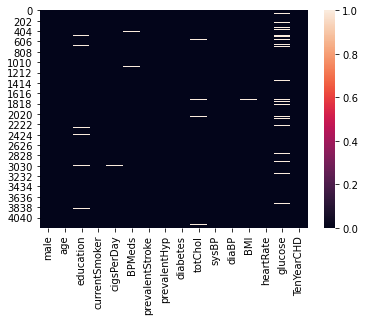

In [70]:
sns.heatmap(df.isna())

## comment on figure above:
- Most NAs are found in the glucose feature

## fill NAs 
- We take the median of the feature to fill the NAs

In [71]:
def fillnawithmedian(df, col):
    new_median = df[col].median()
    df[col][df[col].isna()] = new_median

In [72]:
for column in df.columns:
    print(column, "column has NAs and gets fixed:  \t", df[column].isnull().values.any())
    fillnawithmedian(df = df, col = column)

male column has NAs and gets fixed:  	 False
age column has NAs and gets fixed:  	 False
education column has NAs and gets fixed:  	 True
currentSmoker column has NAs and gets fixed:  	 False
cigsPerDay column has NAs and gets fixed:  	 True
BPMeds column has NAs and gets fixed:  	 True
prevalentStroke column has NAs and gets fixed:  	 False
prevalentHyp column has NAs and gets fixed:  	 False
diabetes column has NAs and gets fixed:  	 False
totChol column has NAs and gets fixed:  	 True
sysBP column has NAs and gets fixed:  	 False
diaBP column has NAs and gets fixed:  	 False
BMI column has NAs and gets fixed:  	 True
heartRate column has NAs and gets fixed:  	 True
glucose column has NAs and gets fixed:  	 True
TenYearCHD column has NAs and gets fixed:  	 False


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# check if there are NAs left in the data set

In [73]:
for column in df.columns:
    print(df[column].isnull().values.any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


# Check the data set if there are floats for a binary classification, in case there are change them to integers

In [74]:
for i in df.columns:
    if (sum(df[i].isin([0,1])) == df.shape[0]) & (df[i].dtype == "int64"):
        print("class1 binary:",i + " has two categories" + " and is dtype int64")
    if (sum(df[i].isin([0,1])) == df.shape[0]) & ~(df[i].dtype == "int64"):
        print("--")
        print("class2 binary:",i + " has two categories" + " and is not dtype int64")
        print("--")
    if ~(sum(df[i].isin([0,1])) == df.shape[0]) & (df[i].dtype == "int64"):
        print("--")
        print("class3 not binary:",i + " has more than two categories" + " and is dtype int64")
        print("--")

class1 binary: male has two categories and is dtype int64
--
class3 not binary: age has more than two categories and is dtype int64
--
class1 binary: currentSmoker has two categories and is dtype int64
--
class2 binary: BPMeds has two categories and is not dtype int64
--
class1 binary: prevalentStroke has two categories and is dtype int64
class1 binary: prevalentHyp has two categories and is dtype int64
class1 binary: diabetes has two categories and is dtype int64
class1 binary: TenYearCHD has two categories and is dtype int64


In [75]:
df.BPMeds.value_counts()

0.0    4116
1.0     124
Name: BPMeds, dtype: int64

In [76]:
df.BPMeds = df.BPMeds.astype(int)

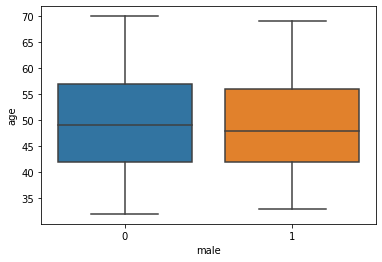

In [77]:
sns.boxplot(y = df.age, x = df.male)
#sns.swarmplot(y = df.age, x = df.male, color = ".3")


In [78]:
print("in this study are " + str(df.male.value_counts()[0]) + " women, and " +  str(df.male.value_counts()[1]) + " men")

in this study are 2420 women, and 1820 men


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9ffd00510>,
      dtype=object)

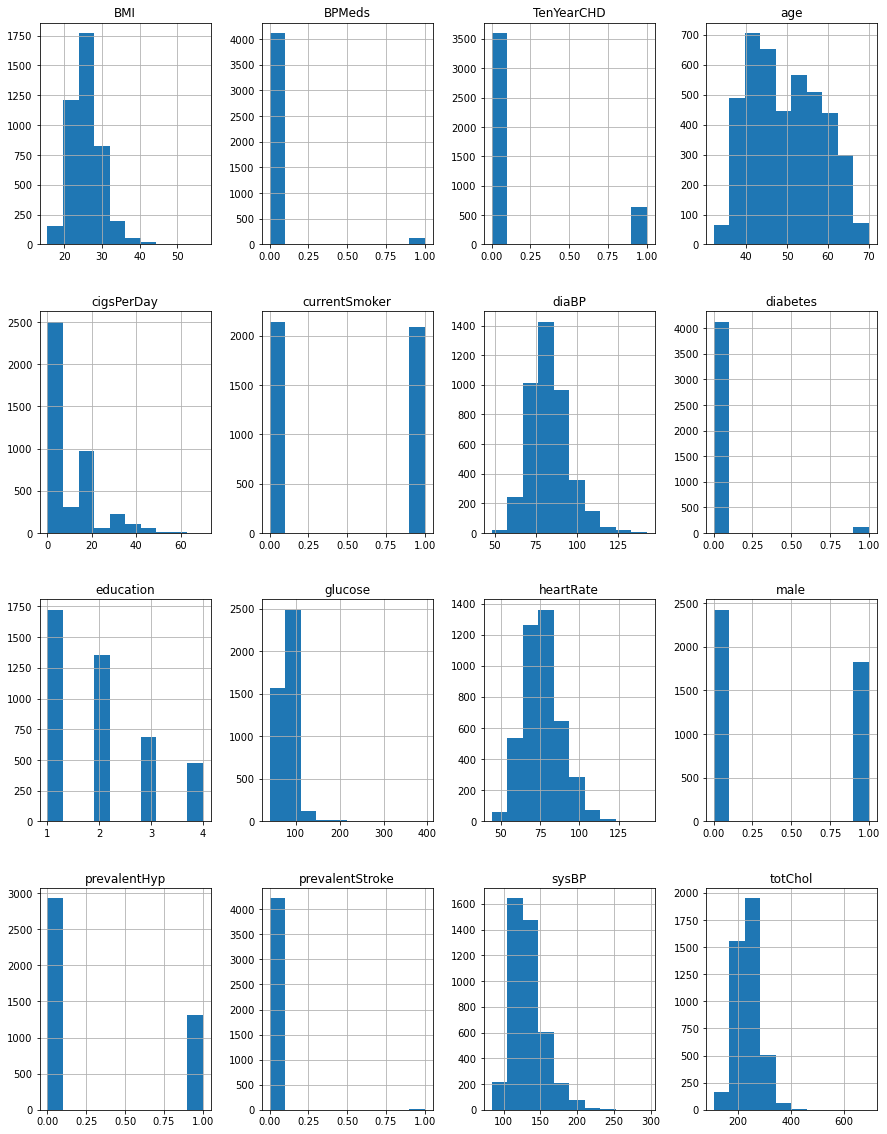

In [79]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

# comment on figure above: 
- Most of the non-binary values are about normal distributed, and fine, without abnormalities. Glucose and total Cholesterol and BMI might have some outlier which might need to be removed. 

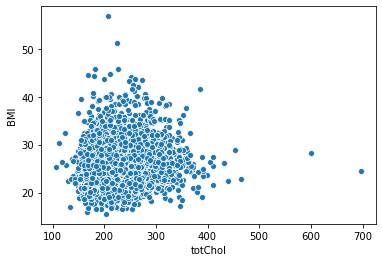

In [80]:
sns.scatterplot(df.totChol, df.BMI)

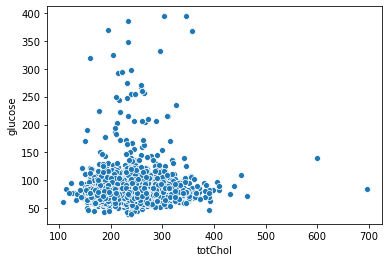

In [81]:
sns.scatterplot(df.totChol, df.glucose)

# comment on figures above: 
- those two outliers with a total Cholesterol of about 600 and 700 will be removed from further analysis. High levels are above 240mg/ dL (https://www.cdc.gov/nchs/fastats/cholesterol.htm). > 600 seems way above the risk level. I wil check however by zscore if those are also detected as outliers if the zscore is above 6

## detection and removal of outliers based on zscore 
- Take here a cutoff of 6 std deviations on the cholesterol levels

In [82]:
# search for outliers:
z = np.abs(stats.zscore(df.totChol))
df = df.iloc[np.where(z < 6)]

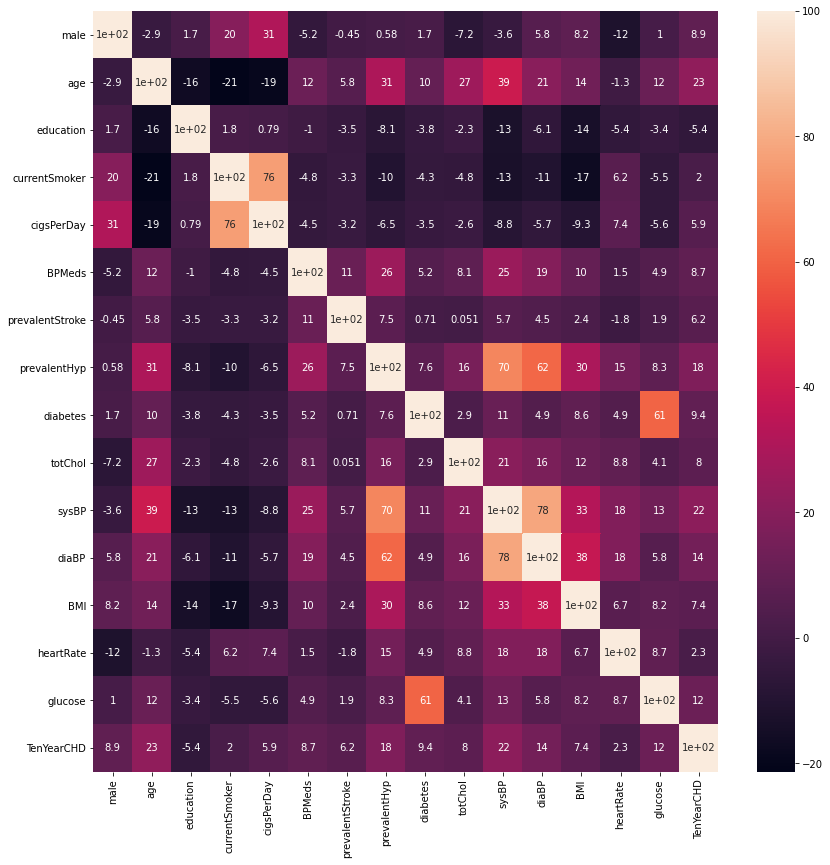

In [83]:
plt.figure(figsize = (14,14))
sns.heatmap(df.corr()*100, annot=True)

# comment on figure above:
- kind of a sanity check of the data. Correlations are observed for glucose levels and diabetes, systolic and diastolic blood pressure, smoker and amount of cigarettes. Correlations seem reasonable

# explore how the numbers are distributed between the genders and how many disease prediction we have in the dataset

In [84]:
pd.crosstab(df.male, df.TenYearCHD)

TenYearCHD,0,1
male,,
0,2119,300
1,1476,343


# comment on table above: 
- Male and female cases are about equally distributed for the ten year CHD event. However there are fewer cases for non CHD events for females.  
- The CHD event and non event are very unequally distributed. This has to be considered for the model

# --------

# end of data exploration 

# --------


# start with data transformation for machine learning and design different model

## scaling

In [85]:
mm_scaler = preprocessing.MinMaxScaler()
df_scaled = mm_scaler.fit_transform(df)

In [86]:
df_scaled = pd.DataFrame(df_scaled)

In [87]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.246499,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.400560,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.386555,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.330532,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.498599,0.219858,0.380952,0.183228,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0.0,0.421053,0.333333,1.0,0.285714,0.0,0.0,0.0,0.0,0.394958,0.224586,0.253968,0.156568,0.404040,0.129944,0.0
4234,0.0,0.315789,0.000000,1.0,0.214286,0.0,0.0,0.0,0.0,0.288515,0.203310,0.412698,0.087736,0.424242,0.107345,0.0
4235,0.0,0.526316,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.453782,0.236407,0.370370,0.143723,0.363636,0.189266,0.0
4236,1.0,0.210526,0.666667,0.0,0.000000,0.0,0.0,1.0,0.0,0.218487,0.271868,0.529101,0.243820,0.232323,0.090395,0.0


# balance out the negative and positive predictions:
    one problem we are running in here is that the distribution between positive and negative cases are heavily unbiased in a ratio of 5:1 of negative to postive cases
    thus we need to equal that out. Otherwise we get tricked into the point that we believe our ML classifier is good, but only predicts the predominant class, which is majority1

In [88]:
shuffled_df = df_scaled.sample(frac=1,random_state=4)


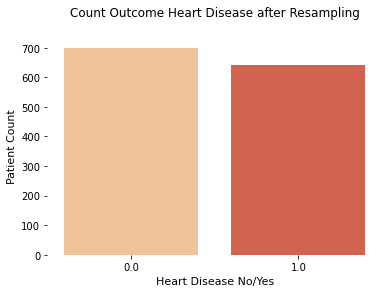

In [89]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset. # 643 hits
CHD_df = shuffled_df[shuffled_df.iloc[:,15] == 1]

#Randomly select 700 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df[shuffled_df.iloc[:,15] == 0].sample(n=800,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.iloc[:,15].value_counts()

# plot new count
sns.countplot(normalized_df.iloc[:,15], palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

## train test split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df.iloc[:,:-1], normalized_df.iloc[:,-1], test_size=0.25, random_state=42)

## scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [91]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [95]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6428571428571429
Precision: 0.6490066225165563
Recall: 0.593939393939394
              precision    recall  f1-score   support

         0.0       0.64      0.69      0.66       171
         1.0       0.65      0.59      0.62       165

    accuracy                           0.64       336
   macro avg       0.64      0.64      0.64       336
weighted avg       0.64      0.64      0.64       336



# SVM with grid search

In [96]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf', "linear"], 'gamma': [0.01, 0.001, 0.0001],
                     'C': [1, 10, 75]}]

In [97]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

In [98]:
scores = ['precision', 'accuracy']


for score in scores:
    print()
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), # support vector classifier 
        tuned_parameters, # see above
        cv=10 , # 5 cross validation steps 
        scoring='%s' % score 
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))



# Tuning hyper-parameters for precision



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined a

Best parameters set found on development set:

{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}

Grid scores on development set:

0.643 (+/-0.137) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.659 (+/-0.113) for {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
0.000 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.659 (+/-0.113) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.000 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.659 (+/-0.113) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.638 (+/-0.097) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.653 (+/-0.118) for {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
0.643 (+/-0.137) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.653 (+/-0.118) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.000 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.653 (+/-0.118) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.655 (+/-0.102) for {'C': 75, 'gamma': 0.01, 'kernel': 'rbf'}
0.653 (+/-0.118) for {'C': 75, '

In [99]:
print("With following parameters",clf.best_params_, " we get the following scores:")

With following parameters {'C': 75, 'gamma': 0.01, 'kernel': 'rbf'}  we get the following scores:


In [100]:
y_true, y_pred = y_test, clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6309523809523809
Precision: 0.621301775147929
Recall: 0.6363636363636364
              precision    recall  f1-score   support

         0.0       0.64      0.63      0.63       171
         1.0       0.62      0.64      0.63       165

    accuracy                           0.63       336
   macro avg       0.63      0.63      0.63       336
weighted avg       0.63      0.63      0.63       336



In [101]:
confusion_matrix(y_test, y_pred)

array([[107,  64],
       [ 60, 105]])

# SVM with grid search and cross validation:

Average difference of 0.005561 with std. dev. of 0.006885.


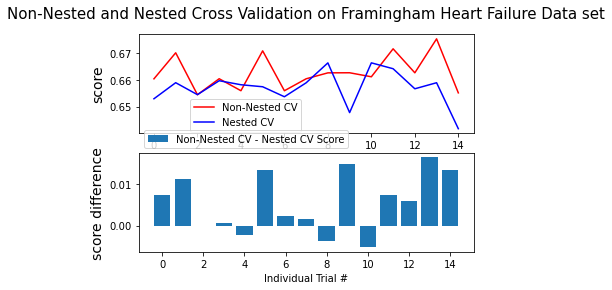

In [102]:
#### code adapted from here ####
## https://scikit-learn.org/0.20/auto_examples/model_selection/plot_nested_cross_validation_iris.html
#### 
# Number of random trials
NUM_TRIALS = 15

# Load the dataset
X_data = normalized_df.iloc[:,:-1]
y_target = normalized_df.iloc[:,-1]



# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 75],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_data, y_target)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_data, y=y_target, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Framingham Heart Failure Data set",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

# Gaussian Classifier

## define the model

In [103]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [104]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6071428571428571
Precision: 0.72
Recall: 0.32727272727272727
              precision    recall  f1-score   support

         0.0       0.57      0.88      0.69       171
         1.0       0.72      0.33      0.45       165

    accuracy                           0.61       336
   macro avg       0.65      0.60      0.57       336
weighted avg       0.65      0.61      0.57       336



# Use a deep learning model by a sequential Keras model

## define the model

In [105]:
clf = keras.Sequential([
    keras.layers.Flatten(input_shape=(15,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

clf.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## run the model

In [106]:
clf.fit(X_train, y_train ,epochs=50, batch_size=3, validation_data=(X_test, y_test), callbacks=[history])

test_loss, test_acc = clf.evaluate(X_test, y_test)
y_pred = clf.predict(X_test)
print('Test accuracy:', test_acc)

Epoch 1/50
336/336 [==============================] - 1s 2ms/step - loss: 0.6806 - accuracy: 0.5799 - val_loss: 0.6666 - val_accuracy: 0.6012
Epoch 2/50
336/336 [==============================] - 1s 2ms/step - loss: 0.6494 - accuracy: 0.6167 - val_loss: 0.6557 - val_accuracy: 0.6250
Epoch 3/50
336/336 [==============================] - 1s 2ms/step - loss: 0.6339 - accuracy: 0.6485 - val_loss: 0.6471 - val_accuracy: 0.6488
Epoch 4/50
336/336 [==============================] - 1s 2ms/step - loss: 0.6253 - accuracy: 0.6425 - val_loss: 0.6425 - val_accuracy: 0.6190
Epoch 5/50
336/336 [==============================] - 1s 2ms/step - loss: 0.6165 - accuracy: 0.6564 - val_loss: 0.6472 - val_accuracy: 0.6310
Epoch 6/50
336/336 [==============================] - 1s 2ms/step - loss: 0.6104 - accuracy: 0.6653 - val_loss: 0.6369 - val_accuracy: 0.6250
Epoch 7/50
336/336 [==============================] - 1s 2ms/step - loss: 0.6073 - accuracy: 0.6723 - val_loss: 0.6398 - val_accuracy: 0.6190
Epoch 

## plot the model accuracy and loss function

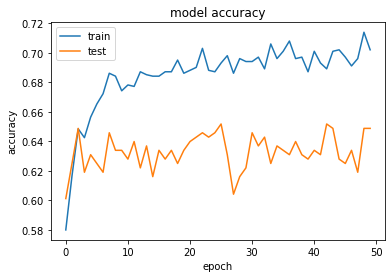

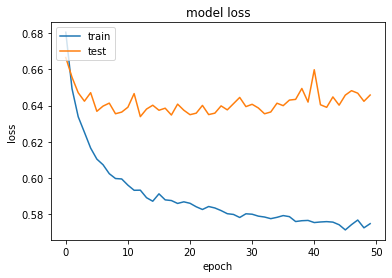

In [107]:
#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [108]:
for i in range(len(y_pred)):
    print(list(y_test)[i], y_pred[i])

0.0 [0.22272152]
1.0 [0.74054295]
1.0 [0.74416745]
1.0 [0.5003588]
0.0 [0.579512]
1.0 [0.73941946]
0.0 [0.06855041]
0.0 [0.6578699]
1.0 [0.98244894]
0.0 [0.5068543]
0.0 [0.5605228]
0.0 [0.3533789]
1.0 [0.7180722]
0.0 [0.23914498]
0.0 [0.3159735]
0.0 [0.6947117]
0.0 [0.69481784]
0.0 [0.37428716]
1.0 [0.5597869]
1.0 [0.5835364]
1.0 [0.5222441]
0.0 [0.19320753]
0.0 [0.28200352]
1.0 [0.75482774]
1.0 [0.4564416]
1.0 [0.92171717]
0.0 [0.31652886]
0.0 [0.25155574]
1.0 [0.7843056]
0.0 [0.7407545]
1.0 [0.70175195]
0.0 [0.39701122]
1.0 [0.77713907]
1.0 [0.5313866]
0.0 [0.4293028]
1.0 [0.17719802]
1.0 [0.56803244]
1.0 [0.41033044]
1.0 [0.82859534]
1.0 [0.5930028]
1.0 [0.6420581]
0.0 [0.09306762]
1.0 [0.4760965]
1.0 [0.39329898]
0.0 [0.68042654]
0.0 [0.77145416]
1.0 [0.5237332]
1.0 [0.70726126]
1.0 [0.68691635]
0.0 [0.6239984]
1.0 [0.8396282]
1.0 [0.31741655]
0.0 [0.21200952]
0.0 [0.1894975]
1.0 [0.58029354]
1.0 [0.91621935]
1.0 [0.9673462]
1.0 [0.47364727]
0.0 [0.06591678]
1.0 [0.70052314]
0.0 [0

In [109]:
y_pred_t = pd.DataFrame(y_pred).apply(lambda x:  1 if x.values > 0.5 else 0 , axis = 1 )
y_pred_t.index = y_test.index

In [110]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_t))
print("Precision:",metrics.precision_score(y_test, y_pred_t))
print("Recall:",metrics.recall_score(y_test, y_pred_t))
print(classification_report(y_test, y_pred_t))

Accuracy: 0.6488095238095238
Precision: 0.6217616580310881
Recall: 0.7272727272727273
              precision    recall  f1-score   support

         0.0       0.69      0.57      0.62       171
         1.0       0.62      0.73      0.67       165

    accuracy                           0.65       336
   macro avg       0.65      0.65      0.65       336
weighted avg       0.65      0.65      0.65       336



In [111]:
from sklearn import metrics
import numpy 

Best Threshold=1.000000, G-Mean=0.646


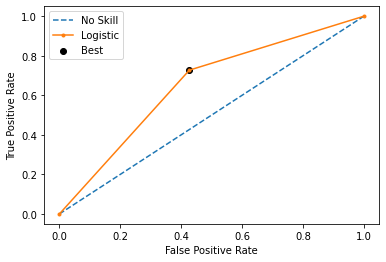

In [112]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_t)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
#Running the example f

# fin